# When Sedans and Trucks Start to Slide

In this project we are going to calculate when vehiucles start to slide on ice or snow is bad weather. The vehicle will start to slide when the brake force applied is more than the traction force. 

**Import Libraries**

We are going to display the data from this simulation in a dataframe, and visualize how speed impacts brake force. For this we are going to need the pandas and matplotlib.pyplot libraries.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

**Create Classes for Vehicles & Snowstorms**

We are going to assign the correct masses and friction levels by creating reusable variables later.

In [65]:
class Vehicle:
    def __init__(self, mass):
        self.mass = mass

class Sedan(Vehicle):
    pass

class Truck(Vehicle):
    pass

class Snowstorm:
    def __init__(self, friction):
        self.friction = friction

**Calculate Brake Force and Maximum Traction**

You calculate the brake force by halving the vehicle mass and multiplying that by speed squared and then dividing that by the distance traveled. This expirement is conducted with 100 meters, or 109 yards. Think of roughly a football field, or a football field plus an endzone. The traction is calculated by multiplying the friction leves the snowstorm creates by the mass of the vehicle multiplied by the force of gravity. 


In [66]:
def will_vehicle_slide(vehicle, speed, distance, snowstorm):
    brake_force = (vehicle.mass / 2) * speed ** 2 / distance
    max_traction_force = snowstorm.friction * vehicle.mass * 9.81
    slide = brake_force > max_traction_force
    return slide, brake_force, max_traction_force

**Unit Conversion**

This expirement originally was conducted over 100 meters with speed increased by meters pet second. These function convert meters into yards and meters per socond into miles per hour.

In [67]:
def convert_mps_to_mph(speed_mps):
    return speed_mps * 2.23694

def convert_meters_to_yards(meters):
    return meters * 1.09361

**Create Snowstorms**

Here we assign a light snowstorm a friction level of .3, and moderate snowstorm with a friction level of .2, and a heavy snowfall with a friction level of .1. We place these storms into sublists with the appropriate string to be accessed. This will help us display our data in a more organized fashion.

In [68]:
light_snowstorm = Snowstorm(friction=0.3)
moderate_snowstorm = Snowstorm(friction=0.2)
heavy_snowstorm = Snowstorm(friction=0.1)
snowstorms = [[light_snowstorm, 'Light Snow'], [moderate_snowstorm, 'Moderate Snow'], [heavy_snowstorm, 'Heavy Snow Fall']]

**Create Vehicles**

Sedans on average have a mass of 1.200kg - 1,800kg, so I gave them an average of 1,500kg. Trucks have a more diverse size range on average ranging between 1,800kg-2,700kg, ao I assigned the class 2,250kg to find a happy avrage and test the equations more complex number handling. 

In [69]:
sedan = Sedan(mass=1500)
truck = Truck(mass=2250)

**Assign Distance**

Here we assign the distance to brake over is 100 meters, or 109 yards.

In [70]:
distance_meters = 100
distance_yards = convert_meters_to_yards(distance_meters)

**DataFrame Template**

Here we create a dictionary of the data we want to save an empty lists for the data to by cycled into.

In [71]:
data = {
    'Snowstorm': [],
    'Speed (mph)': [],
    'Sedan Max Traction Force (N)': [],
    'Truck Max Traction Force (N)': [],
    'Sedan Brake Force (N)': [],
    'Truck Brake Force (N)': [],
    'Sedan Slide': [],
    'Truck Slide': [],
}

**For Loop**

First we iterate over each snowstorm in the snowstorm list and print out which kind of storm we are analyzing.In the innerloop, we work with speeds 1-35 meters per second. We declare the variables we are looking to be returned to find out if each vehicle will slide, the brake force of each vehicle, and the traction force of each vehicle. We call the functions to perform our calculations and then append our data into the dictionary in the appropriate lists. There are two conditional statements in the inner loop. One checks to see if either the truck or sedan will slide at the current speed. If they do the program prints a string containing data about each vehicle. If they both slide the program will break out of the inner loop and move onto the next snow storm. 

In [72]:
for snowstorm in snowstorms:
    print(snowstorm[1])
    for i in range(1, 35):  # Speed in m/s
        slide_sedan, brake_force_sedan, max_traction_sedan = will_vehicle_slide(sedan, i, distance_meters, snowstorm[0])
        slide_truck, brake_force_truck, max_traction_truck = will_vehicle_slide(truck, i, distance_meters, snowstorm[0])

        speed_mph = convert_mps_to_mph(i)

        data['Snowstorm'].append(snowstorm[1])
        data['Speed (mph)'].append(speed_mph)
        data['Sedan Max Traction Force (N)'].append(max_traction_sedan)
        data['Truck Max Traction Force (N)'].append(max_traction_truck)
        data['Sedan Brake Force (N)'].append(brake_force_sedan)
        data['Truck Brake Force (N)'].append(brake_force_truck)
        data['Sedan Slide'].append(int(slide_sedan))
        data['Truck Slide'].append(int(slide_truck))
        
        if slide_sedan or slide_truck:
            print(f'Sedan traveling at {speed_mph} mph and braking with {brake_force_sedan} N: and traction level of {max_traction_sedan} N: Slide = {slide_sedan}')
            print(f'Truck traveling at {speed_mph} mph and braking with {brake_force_truck} N: and traction level of {max_traction_truck} N: Slide = {slide_truck}')
            print(f'Distance: {distance_yards} yards')
        if slide_sedan and slide_truck:
            break

Light Snow
Sedan traveling at 55.923500000000004 mph and braking with 4687.5 N: and traction level of 4414.5 N: Slide = True
Truck traveling at 55.923500000000004 mph and braking with 7031.25 N: and traction level of 6621.75 N: Slide = True
Distance: 109.36099999999999 yards
Moderate Snow
Sedan traveling at 44.738800000000005 mph and braking with 3000.0 N: and traction level of 2943.0 N: Slide = True
Truck traveling at 44.738800000000005 mph and braking with 4500.0 N: and traction level of 4414.5 N: Slide = True
Distance: 109.36099999999999 yards
Heavy Snow Fall
Sedan traveling at 33.554100000000005 mph and braking with 1687.5 N: and traction level of 1471.5 N: Slide = True
Truck traveling at 33.554100000000005 mph and braking with 2531.25 N: and traction level of 2207.25 N: Slide = True
Distance: 109.36099999999999 yards


**Create Our DataFrame**

This dataframe contains the type of storm, speed, traction force of both vehicles brake force of both vehicles, and weather or not they slide at that speed. Speeds that contain sliding vehicle are marked with a '1' in the in the slide field. The sedans and trucks are sliding at the same speeds. 

In [73]:
df = pd.DataFrame(data)
print(df)

          Snowstorm  Speed (mph)  Sedan Max Traction Force (N)  \
0        Light Snow      2.23694                        4414.5   
1        Light Snow      4.47388                        4414.5   
2        Light Snow      6.71082                        4414.5   
3        Light Snow      8.94776                        4414.5   
4        Light Snow     11.18470                        4414.5   
5        Light Snow     13.42164                        4414.5   
6        Light Snow     15.65858                        4414.5   
7        Light Snow     17.89552                        4414.5   
8        Light Snow     20.13246                        4414.5   
9        Light Snow     22.36940                        4414.5   
10       Light Snow     24.60634                        4414.5   
11       Light Snow     26.84328                        4414.5   
12       Light Snow     29.08022                        4414.5   
13       Light Snow     31.31716                        4414.5   
14       L

**Visualization**

This visualization showcases the affect speed has on brake force. As speed increases the amount of force required to brake increases. When brake force is higher than traction force, cars start to slide.

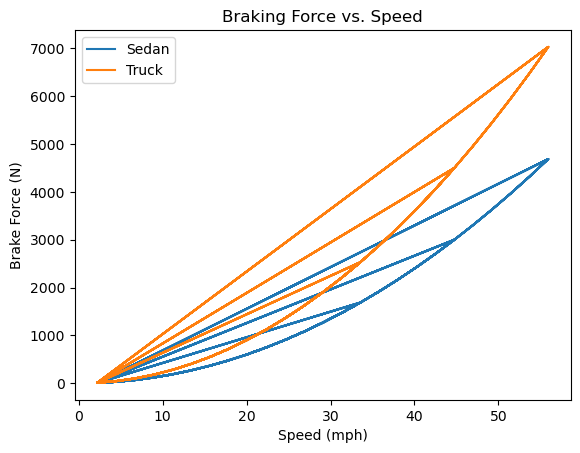

In [63]:
plt.plot(df['Speed (mph)'], df['Sedan Brake Force (N)'], label='Sedan')
plt.plot(df['Speed (mph)'], df['Truck Brake Force (N)'], label='Truck')
plt.xlabel('Speed (mph)')
plt.ylabel('Brake Force (N)')
plt.legend()
plt.title('Braking Force vs. Speed')
plt.show()

## Conclusion

Mass has little to do with how much a vehiclde slides because the brake force it is able to handle increases in ratio. However, speed increases the brake force. So when the speed causes the brake force to become greater than the force of traction the car will begin to slide. Based on the data provided by the expirement and the variables tested, neither vehicle is more likely to slide than the other and both begin sliding at about the same speed. Happy Winter and safe driving!